In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./time-series-19-covid-combined.csv')

In [3]:
population = {'Denmark': 5831404, 'Finland': 5529543, 'Norway': 5379475, 'Sweden': 10353442}

In [4]:
data.head()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0


In [5]:
filtered_data = data[data['Country/Region'].isin(['Denmark', 'Finland', 'Sweden', 'Norway'])]

In [6]:
filtered_data['Country/Region'].unique()

array(['Denmark', 'Finland', 'Norway', 'Sweden'], dtype=object)

In [7]:
len(data), len(filtered_data)

(231744, 4896)

In [8]:
filtered_data = filtered_data[filtered_data.Date <= "2020-05-31"]
filtered_data = filtered_data[filtered_data.Date >= "2020-03-31"]

In [9]:
len(filtered_data)

372

In [10]:
filtered_data.head()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
84117,2020-03-31,Denmark,Faroe Islands,169,74.0,0
84118,2020-04-01,Denmark,Faroe Islands,173,75.0,0
84119,2020-04-02,Denmark,Faroe Islands,177,81.0,0
84120,2020-04-03,Denmark,Faroe Islands,179,91.0,0
84121,2020-04-04,Denmark,Faroe Islands,181,93.0,0


In [11]:
data_agg = filtered_data.groupby(['Country/Region', 'Date'])['Deaths'].sum().reset_index()

In [12]:
data_agg.head()

,Country/Region,Date,Deaths
0,Denmark,2020-03-31,90
1,Denmark,2020-04-01,104
2,Denmark,2020-04-02,123
3,Denmark,2020-04-03,139
4,Denmark,2020-04-04,161


In [13]:
data_agg['Population'] = data_agg['Country/Region'].map(population)

In [14]:
data_agg.head()

,Country/Region,Date,Deaths,Population
0,Denmark,2020-03-31,90,5831404
1,Denmark,2020-04-01,104,5831404
2,Denmark,2020-04-02,123,5831404
3,Denmark,2020-04-03,139,5831404
4,Denmark,2020-04-04,161,5831404


In [15]:
data_agg['Date'] = data_agg['Date'].astype('datetime64[s]')

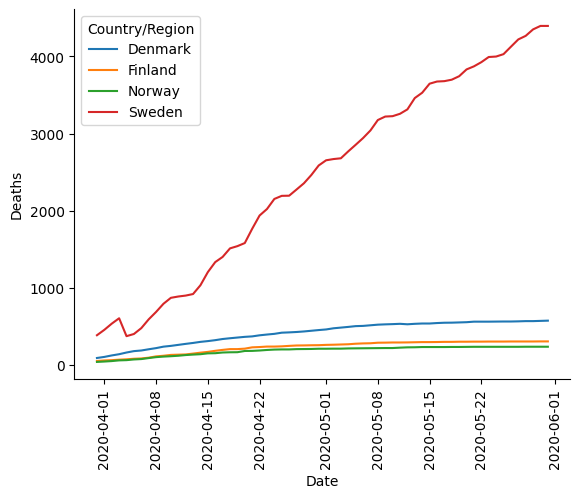

In [16]:
ax = sns.lineplot(data = data_agg, x = 'Date', y = 'Deaths', hue = 'Country/Region')
plt.xticks(rotation = 90);
sns.despine()

In [17]:
data_agg.head()

,Country/Region,Date,Deaths,Population
0,Denmark,2020-03-31,90,5831404
1,Denmark,2020-04-01,104,5831404
2,Denmark,2020-04-02,123,5831404
3,Denmark,2020-04-03,139,5831404
4,Denmark,2020-04-04,161,5831404


In [18]:
data_agg['prev_deaths'] = data_agg.shift(1)['Deaths']

In [19]:
data_agg['diff'] = data_agg['Deaths'] - data_agg['prev_deaths']

In [20]:
data_agg = data_agg[data_agg['Date'] >= '2020-04-01']

In [21]:
data_agg.head()

,Country/Region,Date,Deaths,Population,prev_deaths,diff
1,Denmark,2020-04-01,104,5831404,90.0,14.0
2,Denmark,2020-04-02,123,5831404,104.0,19.0
3,Denmark,2020-04-03,139,5831404,123.0,16.0
4,Denmark,2020-04-04,161,5831404,139.0,22.0
5,Denmark,2020-04-05,179,5831404,161.0,18.0


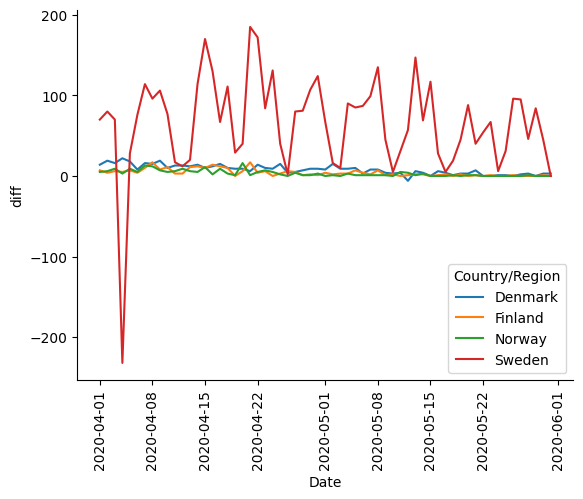

In [22]:
ax = sns.lineplot(data = data_agg, x = 'Date', y = 'diff', hue = 'Country/Region')
plt.xticks(rotation = 90);
sns.despine()

In [23]:
data_agg['diff_norm'] = data_agg['diff'] / data_agg['Population'] * 1000000

In [24]:
data_agg.head()

,Country/Region,Date,Deaths,Population,prev_deaths,diff,diff_norm
1,Denmark,2020-04-01,104,5831404,90.0,14.0,2.400794
2,Denmark,2020-04-02,123,5831404,104.0,19.0,3.258220
3,Denmark,2020-04-03,139,5831404,123.0,16.0,2.743765
4,Denmark,2020-04-04,161,5831404,139.0,22.0,3.772676
5,Denmark,2020-04-05,179,5831404,161.0,18.0,3.086735


In [25]:
data_agg['is_sweden'] = data_agg['Country/Region'] == 'Sweden'

In [26]:
data_agg.head()

,Country/Region,Date,Deaths,Population,prev_deaths,diff,diff_norm,is_sweden
1,Denmark,2020-04-01,104,5831404,90.0,14.0,2.400794,False
2,Denmark,2020-04-02,123,5831404,104.0,19.0,3.258220,False
3,Denmark,2020-04-03,139,5831404,123.0,16.0,2.743765,False
4,Denmark,2020-04-04,161,5831404,139.0,22.0,3.772676,False
5,Denmark,2020-04-05,179,5831404,161.0,18.0,3.086735,False


In [27]:
X = data_agg['is_sweden'].astype(int)
y = data_agg['diff_norm']
# Baseline value / control group = counterfactual 
# Counterfactual = describes what would be true if a premise were different than it actually is

In [28]:
X = sm.add_constant(X)

In [29]:
model = sm.OLS(y, X)

In [30]:
result = model.fit()

In [31]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diff_norm   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     153.6
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           1.20e-27
Time:                        08:53:22   Log-Likelihood:                -610.91
No. Observations:                 244   AIC:                             1226.
Df Residuals:                     242   BIC:                             1233.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9047      0.220      4.119      0.000       0.472       1.337
is_sweden      5.4447      0.439     12.396      0.000       4.579       6.310
==============================================================================
Omnibus:                      224.677   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14274.993
Skew:                          -3.157   Prob(JB):                         0.00
Kurtosis:                      39.935   Cond. No.                         2.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b0: When X = 0 (other non-sweden scandanavian countries), the average normalized difference in death rates is 0.9047

b1: (Slope) The average normalized difference in death rate is 5.4447 for Sweden. (Univariate regression)